# Test Using VSCode Jupyter


In [1]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from lmfit.models import LinearModel, LorentzianModel, ExponentialModel

In [2]:
# Read data from GitHub and set index cols for stack()
tsdata = pd.read_csv(
    "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
) 
# Add multi column index for stacking the date columns into rows
tsdata_index = tsdata.set_index(['Province/State','Country/Region','Lat','Long']
)
# Preview the first 5 lines of the loaded data 
tsdata_index.head()

1/22/20  1/23/20  1/24/20  \
Province/State Country/Region Lat      Long                                 
NaN            Afghanistan     33.0000 65.0000        0        0        0   
               Albania         41.1533 20.1683        0        0        0   
               Algeria         28.0339 1.6596         0        0        0   
               Andorra         42.5063 1.5218         0        0        0   
               Angola         -11.2027 17.8739        0        0        0   

                                                1/25/20  1/26/20  1/27/20  \
Province/State Country/Region Lat      Long                                 
NaN            Afghanistan     33.0000 65.0000        0        0        0   
               Albania         41.1533 20.1683        0        0        0   
               Algeria         28.0339 1.6596         0        0        0   
               Andorra         42.5063 1.5218         0        0        0   
               Angola         -11.2027 17.8739        0        0        0   

                                                1/28/20  1/29/20  1/30/20  \
Province/State Country/Region Lat      Long                                 
NaN            Afghanistan     33.0000 65.0000        0        0        0   
               Albania         41.1533 20.1683        0        0        0   
               Algeria         28.0339 1.6596         0        0        0   
               Andorra         42.5063 1.5218         0        0        0   
               Angola         -11.2027 17.8739        0        0        0   

                                                1/31/20  ...  4/12/20  \
Province/State Country/Region Lat      Long              ...            
NaN            Afghanistan     33.0000 65.0000        0  ...      607   
               Albania         41.1533 20.1683        0  ...      446   
               Algeria         28.0339 1.6596         0  ...     1914   
               Andorra         42.5063 1.5218         0  ...      638   
               Angola         -11.2027 17.8739        0  ...       19   

                                                4/13/20  4/14/20  4/15/20  \
Province/State Country/Region Lat      Long                                 
NaN            Afghanistan     33.0000 65.0000      665      714      784   
               Albania         41.1533 20.1683      467      475      494   
               Algeria         28.0339 1.6596      1983     2070     2160   
               Andorra         42.5063 1.5218       646      659      673   
               Angola         -11.2027 17.8739       19       19       19   

                                                4/16/20  4/17/20  4/18/20  \
Province/State Country/Region Lat      Long                                 
NaN            Afghanistan     33.0000 65.0000      840      906      933   
               Albania         41.1533 20.1683      518      539      548   
               Algeria         28.0339 1.6596      2268     2418     2534   
               Andorra         42.5063 1.5218       673      696      704   
               Angola         -11.2027 17.8739       19       19       24   

                                                4/19/20  4/20/20  4/21/20  
Province/State Country/Region Lat      Long                                
NaN            Afghanistan     33.0000 65.0000      996     1026     1092  
               Albania         41.1533 20.1683      562      584      609  
               Algeria         28.0339 1.6596      2629     2718     2811  
               Andorra         42.5063 1.5218       713      717      717  
               Angola         -11.2027 17.8739       24       24       24  

[5 rows x 91 columns]

In [3]:
# stack date columns into rows
tsdata_stack = tsdata_index.stack()
tsdata_stack



Province/State  Country/Region  Lat        Long              
NaN             Afghanistan     33.000000  65.000000  1/22/20    0
                                                      1/23/20    0
                                                      1/24/20    0
                                                      1/25/20    0
                                                      1/26/20    0
                                                                ..
                Yemen           15.552727  48.516388  4/17/20    1
                                                      4/18/20    1
                                                      4/19/20    1
                                                      4/20/20    1
                                                      4/21/20    1
Length: 24024, dtype: int64

In [4]:

# Reset the index to repeat the index values
tsdata_stack = tsdata_stack.reset_index()
# The stack and reset_index create column names that need changing
tsdata_stack.rename(columns={'level_0':'row_id','Province/State':'prov_state','Country/Region':'country','Lat':'lat','Long':'lon','level_4':'date_char',0:"cases"}, inplace=True)
# Convert the date character field to a pandas date
tsdata_stack['date'] = pd.to_datetime(tsdata_stack['date_char'])
tsdata_stack

,prov_state,country,lat,lon,date_char,cases,date
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0,2020-01-22
1,NaN,Afghanistan,33.000000,65.000000,1/23/20,0,2020-01-23
2,NaN,Afghanistan,33.000000,65.000000,1/24/20,0,2020-01-24
3,NaN,Afghanistan,33.000000,65.000000,1/25/20,0,2020-01-25
4,NaN,Afghanistan,33.000000,65.000000,1/26/20,0,2020-01-26
...,...,...,...,...,...,...,...
24019,NaN,Yemen,15.552727,48.516388,4/17/20,1,2020-04-17
24020,NaN,Yemen,15.552727,48.516388,4/18/20,1,2020-04-18
24021,NaN,Yemen,15.552727,48.516388,4/19/20,1,2020-04-19
24022,NaN,Yemen,15.552727,48.516388,4/20/20,1,2020-04-20


In [5]:
# Check of column names
tsdata_stack.columns

Index(['prov_state', 'country', 'lat', 'lon', 'date_char', 'cases', 'date'], dtype='object')

In [6]:
# Aggregate to basic global timeseries
tsdata_global = tsdata_stack.groupby(['date'])[['cases']].sum().reset_index()
tsdata_global['days_since'] = (pd.to_datetime('2020-01-21') - tsdata_global['date']).dt.days.abs()
tsdata_global

,date,cases,days_since
0,2020-01-22,555,1
1,2020-01-23,654,2
2,2020-01-24,941,3
3,2020-01-25,1434,4
4,2020-01-26,2118,5
...,...,...,...
86,2020-04-17,2240190,87
87,2020-04-18,2317758,88
88,2020-04-19,2401378,89
89,2020-04-20,2472258,90


In [7]:
# Plot the results
tsdata_global.set_index('date')['cases']


date
2020-01-22        555
2020-01-23        654
2020-01-24        941
2020-01-25       1434
2020-01-26       2118
               ...   
2020-04-17    2240190
2020-04-18    2317758
2020-04-19    2401378
2020-04-20    2472258
2020-04-21    2561043
Name: cases, Length: 91, dtype: int64

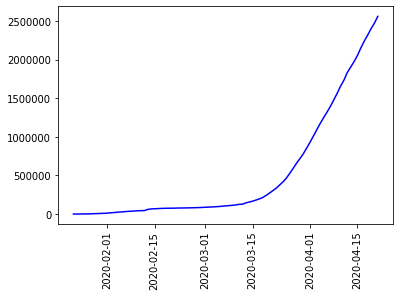

In [8]:


plt.plot(tsdata_global['date'], tsdata_global['cases'], 'b')
plt.xticks(rotation=90)
plt.show()

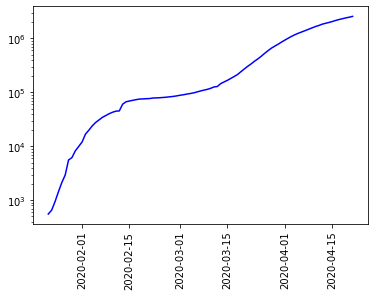

In [9]:
plt.plot(tsdata_global['date'], tsdata_global['cases'], 'b')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

# Install python package

```bash
!pip install lmfit --user
```

In [10]:
## Only use recent data as exponential is changing with social distancing
tsdata_recent = tsdata_global[tsdata_global['date'] >= '2020-04-01']
tsdata_recent

,date,cases,days_since
70,2020-04-01,932605,71
71,2020-04-02,1013466,72
72,2020-04-03,1095917,73
73,2020-04-04,1176060,74
74,2020-04-05,1249754,75
75,2020-04-06,1321481,76
76,2020-04-07,1396476,77
77,2020-04-08,1480202,78
78,2020-04-09,1565278,79
79,2020-04-10,1657526,80


In [11]:
## Fit a model
model = ExponentialModel()
params = model.guess(tsdata_recent['cases'], x=tsdata_recent['days_since'])
result = model.fit(tsdata_recent['cases'], params, x=tsdata_recent['days_since'])

In [12]:
params


name,value,initial value,min,max,vary
amplitude,30586.9252,None,-inf,inf,True
decay,-20.2622052,None,-inf,inf,True


In [13]:
result

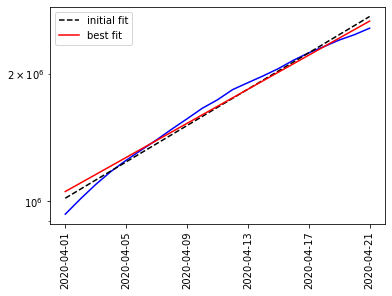

In [14]:
# Plot the results
plt.plot(tsdata_recent['date'], tsdata_recent['cases'], 'b')
plt.plot(tsdata_recent['date'], result.init_fit, 'k--', label='initial fit')
plt.plot(tsdata_recent['date'], result.best_fit, 'r-', label='best fit')
plt.legend(loc='best')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

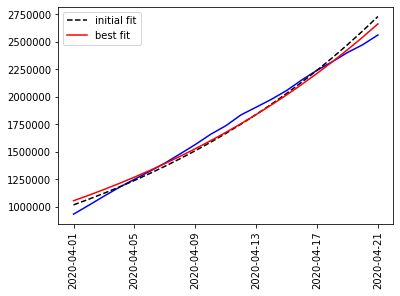

In [15]:
plt.plot(tsdata_recent['date'], tsdata_recent['cases'], 'b')
plt.plot(tsdata_recent['date'], result.init_fit, 'k--', label='initial fit')
plt.plot(tsdata_recent['date'], result.best_fit, 'r-', label='best fit')
plt.legend(loc='best')
plt.xticks(rotation=90)
plt.show()

In [48]:
## Score model for values outside fitting range
xwide = np.linspace(1, 100, 100)
predicted = model.eval(params, x=xwide)
tsdata_pred = pd.DataFrame({'x':xwide, 'pred_cases':predicted})

## join dataframes
## Fill the NaN values with 0
tsdata_all = pd.concat([tsdata_global, tsdata_pred], axis=1, sort=False).fillna(0)
tsdata_all

,date,cases,days_since,x,pred_cases
0,2020-01-22 00:00:00,555.0,1.0,1.0,3.213435e+04
1,2020-01-23 00:00:00,654.0,2.0,2.0,3.376006e+04
2,2020-01-24 00:00:00,941.0,3.0,3.0,3.546802e+04
3,2020-01-25 00:00:00,1434.0,4.0,4.0,3.726239e+04
4,2020-01-26 00:00:00,2118.0,5.0,5.0,3.914754e+04
...,...,...,...,...,...
95,0,0.0,0.0,96.0,3.492796e+06
96,0,0.0,0.0,97.0,3.669500e+06
97,0,0.0,0.0,98.0,3.855144e+06
98,0,0.0,0.0,99.0,4.050180e+06


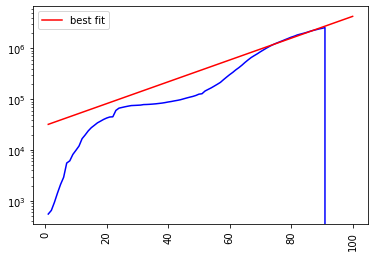

In [50]:
# Plot the results
plt.plot(tsdata_all['x'], tsdata_all['cases'], 'b')
plt.plot(tsdata_all['x'], tsdata_all['pred_cases'], 'r-', label='best fit')
plt.legend(loc='best')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()